# Chapter 2



## Function to fetch the data 

In [1]:
import os 
import tarfile 
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH=os.path.join('datasets','housing')
HOUSING_URL= DOWNLOAD_ROOT +"datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

### Load the data


In [5]:
import pandas as pd 

In [6]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [7]:
housing=load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Visualizing the data

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

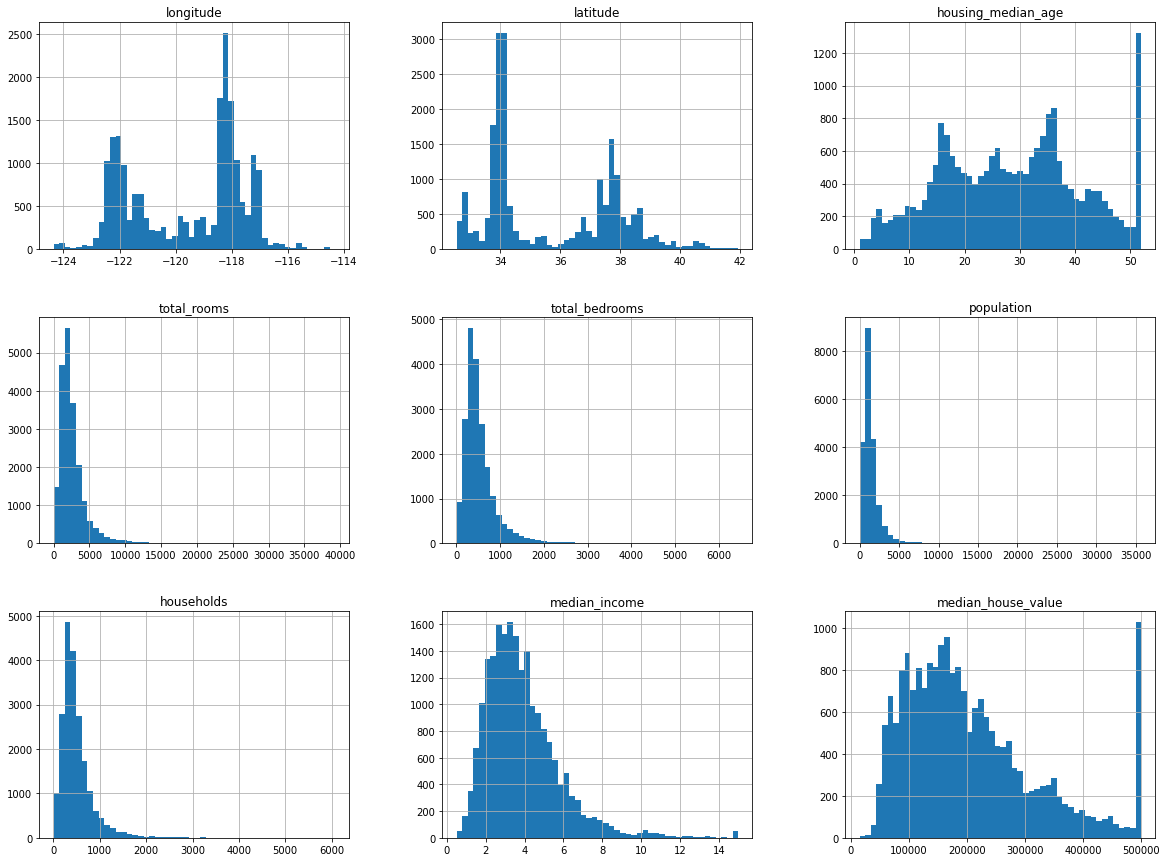

In [12]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

### Split dataset

In [13]:
import numpy as np 

In [14]:
def split_train_test(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [15]:
train_set,test_set=split_train_test(housing ,0.2)

### different variations to keep the data 

In [16]:
from zlib import crc32

In [17]:
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier))&0xffffffff <test_ratio * 2**32

In [18]:
def split_train_test_by_id(data,test_ratio,id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[-in_test_set],data.loc[in_test_set]

In [19]:
housing_with_id=housing.reset_index()
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,"index")

In [20]:
housing_with_id['id']=housing['longitude']*1000+housing['latitude']
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,'id')

### Scikit learn split dataset

In [21]:
from sklearn.model_selection import train_test_split 

In [22]:
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

### income strata

<AxesSubplot:>

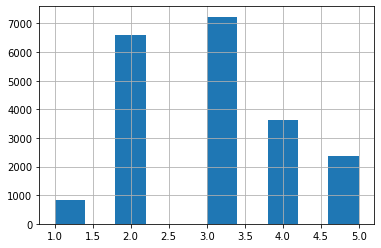

In [23]:
housing["income_cat"]=pd.cut(housing['median_income'],bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
housing.income_cat.hist()

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

In [25]:
split =StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]    

In [26]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [27]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat',axis=1,inplace=True)

In [28]:
housing =strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

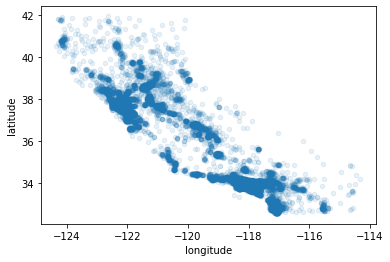

In [29]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

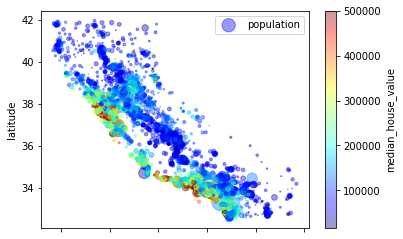

In [30]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing.population/100,label='population',c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)

### searching for corr 

In [31]:
corr_matrix=housing.corr()

In [32]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [33]:
from pandas.plotting import scatter_matrix

In [34]:
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

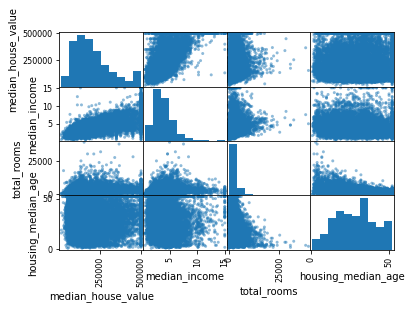

In [35]:
scatter_matrix(housing[attributes])

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

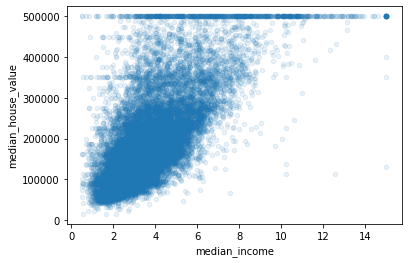

In [36]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [37]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [38]:
housing= strat_train_set.drop('median_house_value',axis=1)
housing_labels =strat_train_set['median_house_value'].copy()

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
imputer=SimpleImputer(strategy='median')
housing_num=housing.drop('ocean_proximity',axis=1)

In [41]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [42]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [43]:
X=imputer.transform(housing_num)

In [44]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

In [45]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [46]:
from sklearn.preprocessing import OrdinalEncoder

In [47]:
housing_cat = housing[["ocean_proximity"]]

In [48]:
ordinal_encoder=OrdinalEncoder()

In [49]:
housing_cat_encoding=ordinal_encoder.fit_transform(housing_cat)

In [50]:
housing_cat_encoding

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [51]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
cat_encoder=OneHotEncoder()

In [54]:
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [55]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [56]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Transformer

In [57]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self, X):
        rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
        
    

In [58]:
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)

### Feature Scaling


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [60]:
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('Std_scaler',StandardScaler()),
    
])
housing_num_tr=num_pipeline.fit_transform(housing_num)

### Column Transformer

In [61]:
from sklearn.compose import ColumnTransformer

In [62]:
num_attribs = list(housing_num)
cat_attribs=['ocean_proximity']
full_pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])
housing_prepared=full_pipeline.fit_transform(housing)


### Select Model

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [65]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)
print('predictions:',lin_reg.predict(some_data_prepared))
print('labels:',list(some_labels))

predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [70]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

### use cross validation

In [71]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-scores) 

In [72]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [73]:
display_scores(tree_rmse_scores)

Scores: [72816.3874941  69114.12534579 68953.09933469 72683.15728418
 68188.60892993 77032.06242523 70299.51157269 73476.06046499
 67864.76218106 68864.85800198]
Mean: 70929.26330346448
Standard deviation: 2812.9766184864525


In [74]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180675


The decision tree is overfitting

### Random forest 

In [75]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [78]:

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18714.689971247186

In [81]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51256.29187269 49228.77541655 46959.56483536 51756.60568573
 47466.01221361 51311.58643562 52416.02780629 49801.1965794
 48962.07442662 53729.0025465 ]
Mean: 50288.71378183845
Standard deviation: 2065.677259471847


In [85]:
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [88]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [89]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [90]:
cvres= grid_search.cv_results_

In [92]:
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

63798.502021466025 {'max_features': 2, 'n_estimators': 3}
55463.020076740846 {'max_features': 2, 'n_estimators': 10}
52956.91569975877 {'max_features': 2, 'n_estimators': 30}
60763.015655357296 {'max_features': 4, 'n_estimators': 3}
52416.99122497895 {'max_features': 4, 'n_estimators': 10}
50589.20570826957 {'max_features': 4, 'n_estimators': 30}
59144.7704703436 {'max_features': 6, 'n_estimators': 3}
51909.17740602723 {'max_features': 6, 'n_estimators': 10}
49836.719555998585 {'max_features': 6, 'n_estimators': 30}
58248.79980458955 {'max_features': 8, 'n_estimators': 3}
52109.492819294246 {'max_features': 8, 'n_estimators': 10}
50159.033904203185 {'max_features': 8, 'n_estimators': 30}
63036.855492353265 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53963.59536301066 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59609.59105245319 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52266.995693203105 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [93]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([6.84872947e-02, 6.32146927e-02, 4.70105571e-02, 1.91797457e-02,
       1.65301678e-02, 1.89436720e-02, 1.62244826e-02, 3.33493318e-01,
       4.94833161e-02, 1.07768929e-01, 9.25823718e-02, 1.33552044e-02,
       1.47370082e-01, 2.82699586e-05, 2.90074111e-03, 3.42715584e-03])

In [94]:
extra_attribs=['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']
cat_encoder=full_pipeline.named_transformers_['cat']
cat_one_hot_attribs=list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3334933175829739, 'median_income'),
 (0.14737008158809026, 'INLAND'),
 (0.10776892888280941, 'pop_per_hhold'),
 (0.09258237175665465, 'bedrooms_per_room'),
 (0.068487294732232, 'longitude'),
 (0.0632146927299459, 'latitude'),
 (0.04948331614024111, 'rooms_per_hhold'),
 (0.04701055713126209, 'housing_median_age'),
 (0.019179745728647106, 'total_rooms'),
 (0.018943671991839776, 'population'),
 (0.016530167837685312, 'total_bedrooms'),
 (0.016224482621766925, 'households'),
 (0.013355204368542381, '<1H OCEAN'),
 (0.003427155839161262, 'NEAR OCEAN'),
 (0.0029007411095316616, 'NEAR BAY'),
 (2.826995861626538e-05, 'ISLAND')]

### Evaluate system 

In [95]:
final_model=grid_search.best_estimator_

In [97]:
X_test=strat_test_set.drop('median_house_value',axis=1)
y_test=strat_test_set['median_house_value'].copy()
X_test_prepared=full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [98]:
final_rmse

48209.24481192936

In [99]:
from scipy import stats
confidence=0.95
squared_errors=(final_predictions-y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46272.07443792, 50071.52581942])

## Exercise solutions

In [101]:
from sklearn.svm import SVR

In [ ]:
param_grid=[
    {'kernel':['linear'],'C':[10.,30.,100.,1000.,3000.,10000.,30000.]},
    {'kernel':['rbf'],'C':[1.,3.,10.,30.,100.,300.,1000.],'gamma':[0.01,0.03,0.1,0.3,1.0,3.0]},
]
svm_reg=SVR()
grid_search=GridSearchCV(svm_reg,param_grid,cv=5,scoring='neg_mean_squared_error',verbose=2)
grid_search.fit(housing_prepared,housing_labels)

In [ ]:
negative_mse=grid_search.best_score_
rmse=np.sqrt(-negative_mse)
rmse

In [ ]:
grid_seearch.best_params_